**Retail Sales Analysis**

In [6]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load CSV files (from drive)

fact_sales = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/FactSales.csv")
dim_customer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/DimCustomer.csv")
dim_product = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/DimProduct.csv")
dim_date = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/DimDate.csv")
dim_region = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/DimRegion.csv")

In [8]:
# Convert Date Columns

fact_sales['OrderDate'] = pd.to_datetime(fact_sales['OrderDate'])
dim_date['Date'] = pd.to_datetime(dim_date['Date'])

In [10]:
# Merge all tables to create a unified dataset

data = fact_sales.merge(dim_customer, on='CustomerID', how='left')\
       .merge(dim_product, on='ProductID', how='left')\
       .merge(dim_region, on='State', how='left')\
       .merge(dim_date, left_on='OrderDate', right_on='Date', how='left')

In [11]:
from os.path import samefile
# -----------------------------
# KPI Summary
# -----------------------------

summary = {
    "Total Sales": data['Sales'].sum(),
    "Total Profit": data['Profit'].sum(),
    "Total Orders": data['OrderID'].nunique(),
    "Total Customers": data['CustomerID'].nunique(),
    "Average Discount": data['Discount'].mean(),
    "Profit Margin": data['Profit'].sum() / data['Sales'].sum()
}

In [13]:
# Print Summary

print("------ KPI Summary ------\n")
for key, value in summary.items():
    print(f"{key}: {value:2f}")

------ KPI Summary ------

Total Sales: 53326.740000
Total Profit: 43213.910000
Total Orders: 200.000000
Total Customers: 20.000000
Average Discount: 0.149350
Profit Margin: 0.810361


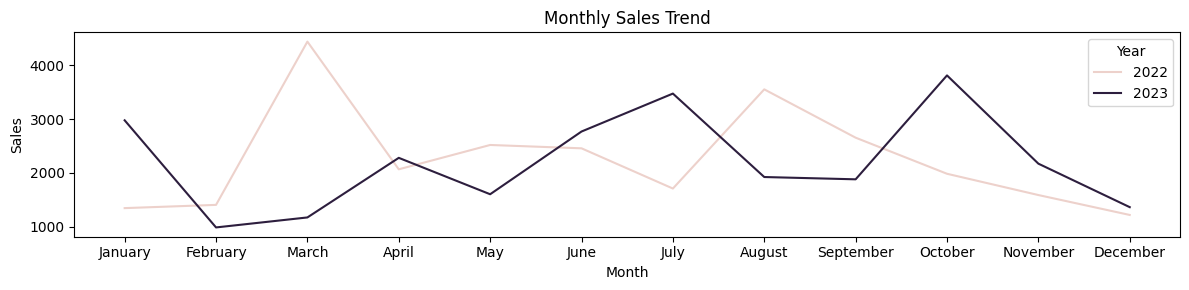

In [27]:
# -----------------------------
# Monthly Sales Trend
# -----------------------------

monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'],
                                        categories=['January','February','March','April','May','June','July','August','September','October','November','December'],
                                        ordered=True)
monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

plt.figure(figsize=(12, 3))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Trend')
plt.xticks()
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

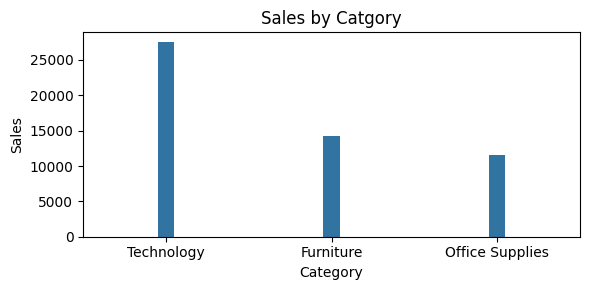

In [24]:
# ----------------------
# Sales by Category
# ----------------------

plt.figure(figsize=(6,3))
sns.barplot(data=data,  x='Category', y='Sales', estimator=sum, errorbar=None, width=0.1)
plt.title("Sales by Catgory")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

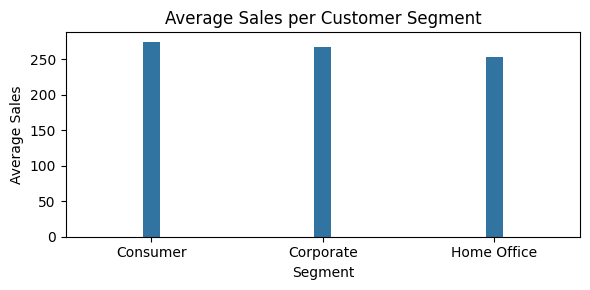

In [25]:
# ------------------------------------
# Average Sales per Customer Segment
# ------------------------------------
avg_sales_segment = data.groupby('Segment')['Sales'].mean().reset_index()
plt.figure(figsize=(6,3))
sns.barplot(data=avg_sales_segment, x='Segment', y='Sales', width=0.1)
plt.title("Average Sales per Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

**Insights & Observations**

A time-based analysis reveals that December consistently experienced peak sales, reflecting typical year-end buying trends or promotional campaigns.

The Furniture category recorded the highest total sales, suggesting strong demand in that product segment, followed closely by Office Supplies and Technology.

When examining customer behavior, the Corporate segment stands out with the highest average sales per transaction, indicating that business customers are contributing significantly to revenue.